# Nature Conservancy Fisheries Kaggle Competition
## Predict fovea from HighResolution Images with FISHFINDER



#### Dependencies

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import pickle
from scipy import misc
import os
import fish_data as fd
import matplotlib.pyplot as plt
% matplotlib inline

### Set up test image and fovea

In [4]:
with open('image_dictionary.pickle', 'rb') as handle :
    image_dictionary = pickle.load(handle)
print("`image_dictionary` loaded!")

img_dict = image_dictionary.copy()
print(img_dict)

`image_dictionary` loaded!
{'data/train/ALB/img_07647.jpg': {'y_size': 720, 'image_label': 'ALB', 'f': 'data/train/ALB/img_07647.jpg', 'x_size': 1280}, 'data/train/SHARK/img_01406.jpg': {'y_size': 720, 'image_label': 'SHARK', 'f': 'data/train/SHARK/img_01406.jpg', 'x_size': 1280}, 'data/train/ALB/img_06942.jpg': {'y_size': 854, 'image_label': 'ALB', 'f': 'data/train/ALB/img_06942.jpg', 'x_size': 1518}, 'data/test_stg1/img_00718.jpg': {'y_size': 720, 'image_label': 'TEST', 'f': 'data/test_stg1/img_00718.jpg', 'x_size': 1280}, 'data/train/YFT/img_01835.jpg': {'y_size': 974, 'image_label': 'YFT', 'f': 'data/train/YFT/img_01835.jpg', 'x_size': 1280}, 'data/train/ALB/img_05681.jpg': {'y_size': 670, 'image_label': 'ALB', 'f': 'data/train/ALB/img_05681.jpg', 'x_size': 1192}, 'data/train/ALB/img_01047.jpg': {'y_size': 750, 'image_label': 'ALB', 'f': 'data/train/ALB/img_01047.jpg', 'x_size': 1280}, 'data/test_stg1/img_00282.jpg': {'y_size': 720, 'image_label': 'TEST', 'f': 'data/test_stg1/img_0

In [5]:
img = misc.imresize(misc.imread(img_dict.get('data/train/LAG/img_01221.jpg')['f'], mode = 'RGB'), size = 0.6, mode = 'RGB')

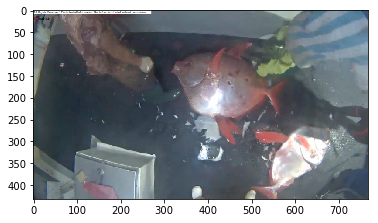

In [6]:
plt.imshow(img)
plt.show()

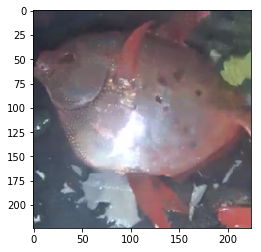

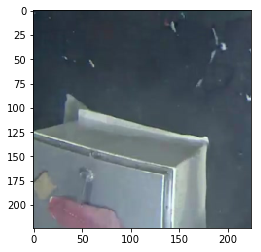

In [7]:
y = 75
x = 320

fish = img[y:y+224, x:x+224, :]
plt.imshow(fish)
plt.show()

y = 200
x = 100
nof = img[y:y+224, x:x+224, :]
plt.imshow(nof)
plt.show()

fish = fd.process_fovea(fish, pixel_norm = 'standard', mutation = False)
nof = fd.process_fovea(nof, pixel_norm = 'standard', mutation = False)

In [30]:
%run -i 'FISH_FINDER_PARAMS.py'

In [34]:
%run -i 'FISH_FINDER_GRAPH.py'

In [10]:
version_ID = 'PILOT_RUN_v5'
initiate_model = False #  Important to change to False or old model will be saved over.  

In [35]:
wd = os.getcwd()
md = wd+'/FISHFINDER_MODELS/'+version_ID
if not os.path.exists(md) :
    os.makedirs(md)
#tensorboard_path = md+'/Tensorboard_logs'



with tf.Session(graph = fish_finder) as session :
    print("Loading FISHFINDER version {}".format(version_ID))
    with open(md+'/meta_dictionary.pickle', 'rb') as  handle :
        meta_dict = pickle.load(handle)
    print("Metadata dictionary loaded!")
    epochs_completed = meta_dict.get(np.max([key for key in meta_dict])).get('Num_epochs')
    total_fovea = meta_dict.get(np.max([key for key in meta_dict])).get('fovea_trained')
    restorer = tf.train.Saver()
    print("Initializing restorer...")
    restorer.restore(session, tf.train.latest_checkpoint(md))
    print("Weights and biases retrieved!  Picking up at {} epochs completed : {} training images observed".format(epochs_completed, total_fovea))


    # Image dictionary - immutable
    print("Loading high-resolution image dictionary...")
    with open('image_dictionary.pickle', 'rb') as handle :
        image_dictionary = pickle.load(handle)
    print("`image_dictionary` loaded!")
    
    fpred, npreds = session.run([fp, nofp])




Loading FISHFINDER version PILOT_RUN_v5
Metadata dictionary loaded!
Initializing restorer...
Weights and biases retrieved!  Picking up at 229 epochs completed : 3439232 training images observed
Loading high-resolution image dictionary...
`image_dictionary` loaded!


In [14]:
print(fpred)
print(reverse_label_dict.get(np.argmax(fpred)))
print(npreds)
print(reverse_label_dict.get(np.argmax(npreds)))

[[  6.75189949e-05   6.39571363e-06   1.79674913e-07   9.98504043e-01
    1.38533907e-03   2.80969459e-07   2.80352720e-11   3.64168554e-05]]
LAG
[[  6.00873679e-02   3.49010370e-05   1.85448189e-05   1.35932451e-05
    9.11665797e-01   7.02816481e-03   1.14145291e-06   2.11504605e-02]]
NoF


It works!!  Fish fovea was predicted as LAG and the nof fovea predicted as NoF!

### Troubleshoot high-res to fovea stack

In [15]:
from importlib import reload

In [16]:
reload(fd)
help(fd.format_pred_arr)

Help on function format_pred_arr in module fish_data:

format_pred_arr(f, fov_size=224, scale=[1.5, 1.0, 0.5], y_bins=10, x_bins=10)
    Converts a high-resolution RGB image into an array stack for fovea prediction
    in the FISHFINDER model.



In [38]:
img = misc.imread('data/train/SHARK/img_06590.jpg')
t_list = fd.format_pred_arr('data/train/ALB/img_04368.jpg', fov_size = 224, scale = [2.0, 1.0, 0.5], y_bins = bins_y, x_bins = bins_x)

In [32]:
t_list[0].shape

(150, 224, 224, 3)

Loading FISHFINDER version PILOT_RUN_v5
Metadata dictionary loaded!
Initializing restorer...
Weights and biases retrieved!  Picking up at 229 epochs completed : 3439232 training images observed
Loading high-resolution image dictionary...
`image_dictionary` loaded!


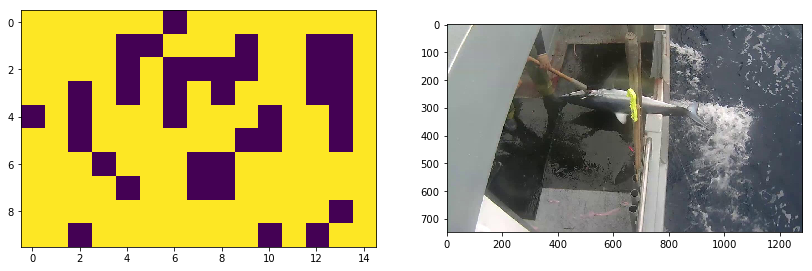

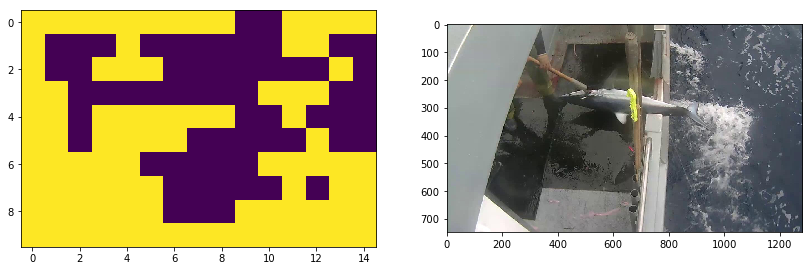

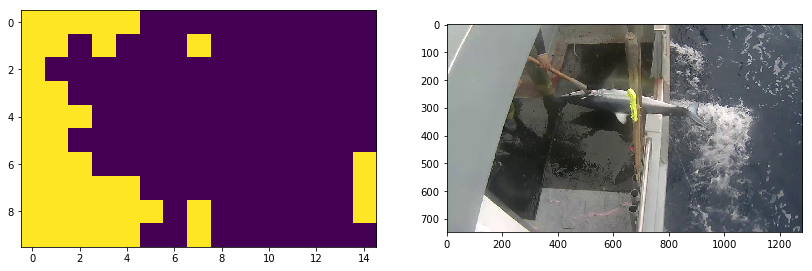

In [39]:
wd = os.getcwd()
md = wd+'/FISHFINDER_MODELS/'+version_ID
if not os.path.exists(md) :
    os.makedirs(md)
#tensorboard_path = md+'/Tensorboard_logs'



with tf.Session(graph = fish_finder) as session :
    print("Loading FISHFINDER version {}".format(version_ID))
    with open(md+'/meta_dictionary.pickle', 'rb') as  handle :
        meta_dict = pickle.load(handle)
    print("Metadata dictionary loaded!")
    epochs_completed = meta_dict.get(np.max([key for key in meta_dict])).get('Num_epochs')
    total_fovea = meta_dict.get(np.max([key for key in meta_dict])).get('fovea_trained')
    restorer = tf.train.Saver()
    print("Initializing restorer...")
    restorer.restore(session, tf.train.latest_checkpoint(md))
    print("Weights and biases retrieved!  Picking up at {} epochs completed : {} training images observed".format(epochs_completed, total_fovea))


    # Image dictionary - immutable
    print("Loading high-resolution image dictionary...")
    with open('image_dictionary.pickle', 'rb') as handle :
        image_dictionary = pickle.load(handle)
    print("`image_dictionary` loaded!")
    
    for i in range(3) :
        stack_preds = session.run(stack_prediction, feed_dict = {img_stack : t_list[i]})
        pred_bin_arr = np.reshape(stack_preds, newshape = [bins_y,bins_x,num_labels])
        binary_bin_arr = pred_bin_arr[:,:,4] > 0.60 
        f, axarr = plt.subplots(1,2, figsize=(14,10))
        axarr[0].imshow(binary_bin_arr)
        axarr[1].imshow(img)
        plt.show()

In [24]:
np.argmax(pred_bin_arr, -1)

array([[4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4,
        5, 4, 5],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
        4, 5, 5],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
        4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 4, 5],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5],
       [4, 4, 4, 4, 4, 4, 4, 4, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5],
       [4, 4, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5],
       [4, 4, 4, 4, 4, 4, 4, 0, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5],
       [4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5,
      

In [25]:
pred_bin_arr[2,-1,:]

array([ 0.25216016,  0.04446696,  0.01436547,  0.01724983,  0.28581688,
        0.30170742,  0.00762107,  0.0766122 ], dtype=float32)

In [26]:
binary_bin_arr = pred_bin_arr[:,:,4] > 0.5 

In [29]:
binary_bin_arr

array([[ True,  True,  True, False,  True,  True,  True,  True,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False],
       [ True,  True,  True,  True, False,  True,  True,  True,  True,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False, False, False, False,
        False, False, False, False, False, False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
        False, False, False,  True,  True, False, False, False, False,
        False, False, False, False, False, False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True, False,
        False, False, False,  True,  True, False, False, False, False,
        False, False, False, False, False,  True, False],
